In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('work.csv')
df.columns = df.columns.str.strip()
df.columns = [col.lower().replace(',', '').replace('.', '').replace(" ", '_') for col in df.columns]
df.head()

,type_of_nucleic_acid,aptamer_sequence,sequence_length,gc_content,kd_(nm),type_of_the_buffer,ph,filtered_sequence
0,12,GGGAGAAUUCCCGCGGCGUUGGCCCAGGAUAAUAGGACGAAAUCCG...,133,0.593985,100000.0,3,7.600000,MKMDKKTIVWFRRDLRIEDNPALAAAAHEGSVFPVFIWCPEEEGQF...
1,12,GAAUUGUGGUGUUGGCUCCCUAUAGUGAGUCGUAUUAAUAUUCCUU...,113,0.336283,4.8,0,7.466744,MKEFYISIETVGNNIVERYIDENGKERTREVEYLPTMFRHCKEESK...
2,12,GAAUUGUGGUGUUGGCUCCCUAUAGUGAGUCGUAUUAAUAUUCCUU...,113,0.353982,4.8,0,7.466744,MKEFYISIETVGNNIVERYIDENGKERTREVEYLPTMFRHCKEESK...
3,11,GGTTGGTGTGGTTGG,15,0.600000,112.5,3,7.400000,TSEDHFQPFFNEKTFGAGEADCGLRPLFEKKQVQDQTEKELFESYI...
4,11,GGTTGG,6,0.666667,112.5,3,7.400000,TSEDHFQPFFNEKTFGAGEADCGLRPLFEKKQVQDQTEKELFESYI...


## ЧАСТЬ I

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type_of_nucleic_acid  751 non-null    int64  
 1   aptamer_sequence      751 non-null    object 
 2   sequence_length       751 non-null    int64  
 3   gc_content            751 non-null    float64
 4   kd_(nm)               751 non-null    float64
 5   type_of_the_buffer    751 non-null    int64  
 6   ph                    751 non-null    float64
 7   filtered_sequence     751 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 47.1+ KB


In [80]:
# Группировка данных по типу аптамеров
grouped_df = df.groupby('type_of_nucleic_acid')

In [81]:
sorted_df = df.sort_values(by='type_of_nucleic_acid').reset_index(drop=True)
sorted_df.head()  

,type_of_nucleic_acid,aptamer_sequence,sequence_length,gc_content,kd_(nm),type_of_the_buffer,ph,filtered_sequence
0,0,TCGCCTTGCCGGATCGCAGACCAACAGGACCAGCACGGGGGGGCTG...,70,0.628571,4.2,3,7.4,MSHVRGLGLPGCLALAALASLVHSQHVFLAPQQALSLLQRVRRANS...
1,0,TCGCCTTGCCGGATCGCAGACTCTTAACAGGACTCATGCACGGGGG...,70,0.628571,18.0,3,7.4,MKFTALAKATLALGILTTGTLTTEVHSGHAKQNQKSVNKHDKEALY...
2,0,TCGCCTTGCCGGATCGCAGACCGACAGGACACAGCACGCGGGGGCT...,70,0.642857,20.0,3,7.4,MKFTALAKATLALGILTTGTLTTEVHSGHAKQNQKSVNKHDKEALY...
3,0,TCGCCTTGCCGGATCGCAGACCGACAGGACCAGCACGGGGGGGCTG...,70,0.642857,27.0,3,7.4,MKFTALAKATLALGILTTGTLTTEVHSGHAKQNQKSVNKHDKEALY...
4,0,TCGCCTTGCCGGATCGCAGACCAACAGGACAAGGAAACAAACCCGC...,70,0.571429,23.0,3,7.4,MKFTALAKATLALGILTTGTLTTEVHSGHAKQNQKSVNKHDKEALY...


In [82]:
rna_data_12 = sorted_df[sorted_df['type_of_nucleic_acid'] == 12]
rna_data_11 = sorted_df[sorted_df['type_of_nucleic_acid'] == 11]
rna_data_10 = sorted_df[sorted_df['type_of_nucleic_acid'] == 10]
rna_data_9 = sorted_df[sorted_df['type_of_nucleic_acid'] == 9]
rna_data_8 = sorted_df[sorted_df['type_of_nucleic_acid'] == 8]
rna_data_7 = sorted_df[sorted_df['type_of_nucleic_acid'] == 7]
rna_data_6 = sorted_df[sorted_df['type_of_nucleic_acid'] == 6]
rna_data_5 = sorted_df[sorted_df['type_of_nucleic_acid'] == 5]
rna_data_4 = sorted_df[sorted_df['type_of_nucleic_acid'] == 4]
rna_data_3 = sorted_df[sorted_df['type_of_nucleic_acid'] == 3]
rna_data_2 = sorted_df[sorted_df['type_of_nucleic_acid'] == 2]
rna_data_1 = sorted_df[sorted_df['type_of_nucleic_acid'] == 1]
rna_data_0 = sorted_df[sorted_df['type_of_nucleic_acid'] == 0]

### Расчет дескрипторов

In [83]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from PyBioMed.PyProtein import CTD

In [84]:
# Функция для расчета дескрипторов аптамеров
def calculate_aptamer_descriptors(sequence):
    try:
        mol = Chem.MolFromSequence(sequence)
        descriptors = {
            'MolWt': Descriptors.MolWt(mol),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
            'TPSA': Descriptors.TPSA(mol),
            'MolLogP': Descriptors.MolLogP(mol)
        }
        return descriptors
    except Exception:
        return np.nan
    
# Её надо проверить на правильность

In [85]:
def apply_aptamer_descriptors(df, sequence: str):
    return calculate_aptamer_descriptors

In [86]:
rna_data_12.iloc[0]

type_of_nucleic_acid                                                   12
aptamer_sequence        GGGAGGACGAUGCGGUCCUGUCGUCUGUUCGUCCCCAGACGACUCG...
sequence_length                                                        51
gc_content                                                       0.666667
kd_(nm)                                                             122.0
type_of_the_buffer                                                      1
ph                                                                    7.5
filtered_sequence       MDSYLLMWGLLTFIMVPGCQAELCDDDPPEIPHATFKAMAYKEGTM...
Name: 532, dtype: object

In [87]:
calculate_aptamer_descriptors(rna_data_12.iloc[0].filtered_sequence)

{'MolWt': 19938.06599999998,
 'NumRotatableBonds': 663,
 'TPSA': 8204.129999999961,
 'MolLogP': -95.98120000000483}

In [89]:
df['mol_wt'] = ''
df['num_rotatable_bonds'] = ''
df['tpsa'] = ''
df['mol_log_p'] = ''

for i in range(df.shape[0]):
    try:
        descriptors = calculate_aptamer_descriptors(rna_data_12.iloc[i].filtered_sequence)
    except Exception:
        print(i)
    if type(descriptors) == dict:
        df.at[i, 'mol_wt'] = descriptors['MolWt']
        df.at[i, 'num_rotatable_bonds'] = descriptors['NumRotatableBonds']
        df.at[i, 'tpsa'] = descriptors['TPSA']
        df.at[i, 'mol_log_p'] = descriptors['MolLogP']

df.head()

219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468


,type_of_nucleic_acid,aptamer_sequence,sequence_length,gc_content,kd_(nm),type_of_the_buffer,ph,filtered_sequence,mol_wt,num_rotatable_bonds,tpsa,mol_log_p
0,12,GGGAGAAUUCCCGCGGCGUUGGCCCAGGAUAAUAGGACGAAAUCCG...,133,0.593985,100000.0,3,7.600000,MKMDKKTIVWFRRDLRIEDNPALAAAAHEGSVFPVFIWCPEEEGQF...,19938.066,663,8204.13,-95.9812
1,12,GAAUUGUGGUGUUGGCUCCCUAUAGUGAGUCGUAUUAAUAUUCCUU...,113,0.336283,4.8,0,7.466744,MKEFYISIETVGNNIVERYIDENGKERTREVEYLPTMFRHCKEESK...,134278.328,714,54936.71,-838.7446
2,12,GAAUUGUGGUGUUGGCUCCCUAUAGUGAGUCGUAUUAAUAUUCCUU...,113,0.353982,4.8,0,7.466744,MKEFYISIETVGNNIVERYIDENGKERTREVEYLPTMFRHCKEESK...,34932.516,713,14449.86,-254.95599
3,11,GGTTGGTGTGGTTGG,15,0.600000,112.5,3,7.400000,TSEDHFQPFFNEKTFGAGEADCGLRPLFEKKQVQDQTEKELFESYI...,73107.795,730,30882.71,-636.91317
4,11,GGTTGG,6,0.666667,112.5,3,7.400000,TSEDHFQPFFNEKTFGAGEADCGLRPLFEKKQVQDQTEKELFESYI...,69525.328,704,28032.07,-543.13314


# ЧАСТЬ II
### Анализ распределения, работа с выбросами

In [90]:
def graph_histplot_bin(dd, factor):  # Исследование количественных шкал, построение гистограммы и ящика с усами
    sns.set(style='white')
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    sns.histplot(dd[factor], bins=20, kde=True, ax=ax[0]) 
    sns.boxplot(data=dd, y=factor, ax=ax[1], color="pink")
    
    ax[0].axvline(np.mean(dd[factor]),color='r', linestyle='-', label='Среднее')
    ax[0].axvline(np.median(dd[factor]),color='b', linestyle='--', label='Медиана')
    
    ax[0].set_xlabel(factor.capitalize(), size=13)
    ax[0].set_ylabel('')
    ax[1].set_xlabel('')
    
    ax[0].legend(loc='center right')
    
    plt.suptitle(f'Исследование данных на нормальность шкалы {factor}', size=12, y=1.01)
    plt.show()

In [94]:
def outlier(df, col):  # Ф-я для удаления выбросов
    f_b = df[col].quantile(0.25)
    s_b = df[col].quantile(0.75)
    iqr = s_b - f_b
    lower = f_b - 3 * iqr
    higher = s_b + 3 * iqr
    med = df[col].median()

    df.drop(df[(df[col] < lower) | (df[col] > higher)].index, inplace=True)
    return df
    

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type_of_nucleic_acid  751 non-null    int64  
 1   aptamer_sequence      751 non-null    object 
 2   sequence_length       751 non-null    int64  
 3   gc_content            751 non-null    float64
 4   kd_(nm)               751 non-null    float64
 5   type_of_the_buffer    751 non-null    int64  
 6   ph                    751 non-null    float64
 7   filtered_sequence     751 non-null    object 
 8   mol_wt                751 non-null    object 
 9   num_rotatable_bonds   751 non-null    object 
 10  tpsa                  751 non-null    object 
 11  mol_log_p             751 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 70.5+ KB


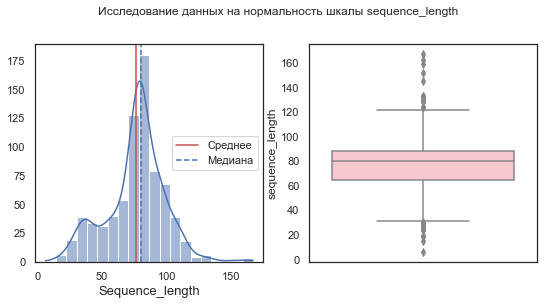

In [93]:
graph_histplot_bin(df, 'sequence_length')

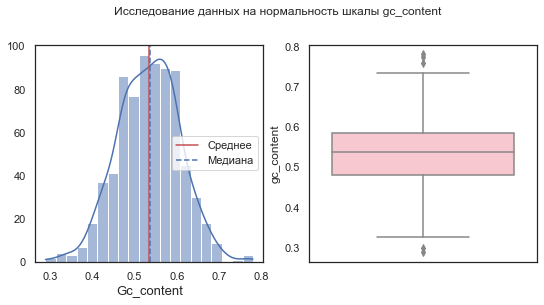

In [96]:
graph_histplot_bin(df, 'gc_content')

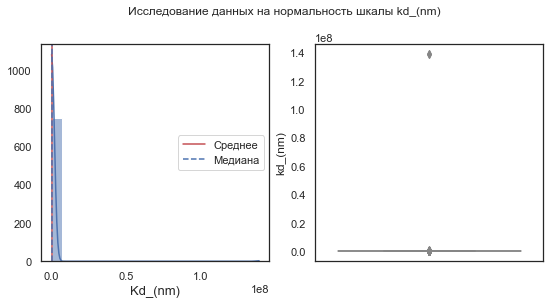

In [97]:
graph_histplot_bin(df, 'kd_(nm)')

Удалим выбросы.

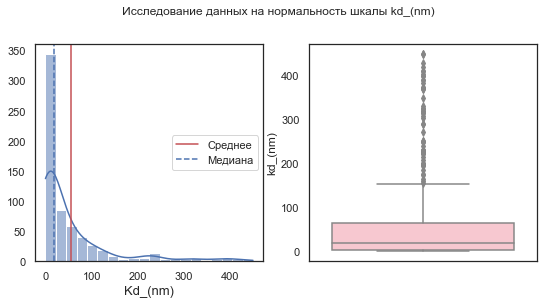

In [98]:
outlier(df, 'kd_(nm)')
graph_histplot_bin(df, 'kd_(nm)')

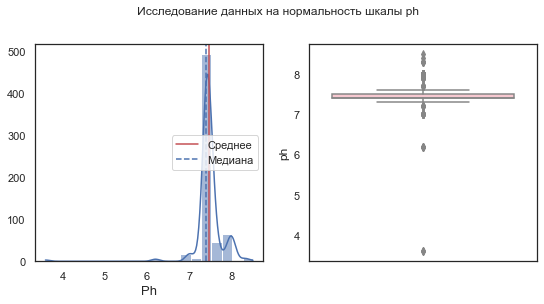

In [99]:
graph_histplot_bin(df, 'ph')

Во всех колонках, кроме kd данные распределены нормально, выбросов не обнаружено.

### Графический анализ данных

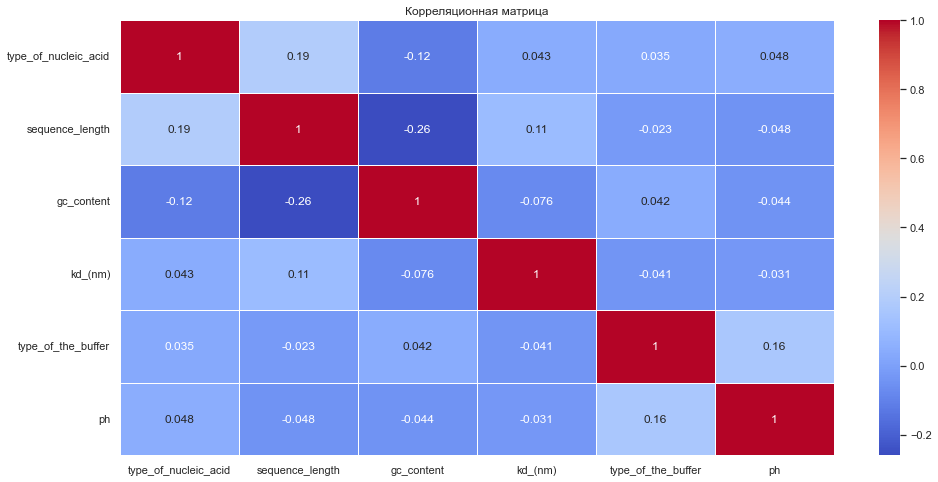

In [100]:
df_corr = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_corr.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

Слабая отрицательная корреляция между колонками 
          'sequence_length' и 'gc_content';
          'gc_content' и 'type_of_nucleic_acid'
Слабая корреляция между целевой kd и  'sequence_length'
